In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
accounts = pd.read_csv("archive/ravenstack_accounts.csv")
subscriptions = pd.read_csv("archive/ravenstack_subscriptions.csv")
feature_usage = pd.read_csv("archive/ravenstack_feature_usage.csv")
support_tickets = pd.read_csv("archive/ravenstack_support_tickets.csv")
churn_events = pd.read_csv("archive/ravenstack_churn_events.csv")

In [4]:
industry_churn = accounts.groupby("industry").agg({
    "account_id" : "nunique",
    "churn_flag" : "sum"
})
industry_churn.columns = ["Total_Customers", "Churned_Customers"]

industry_churn["Churn_Rate"] = (
    industry_churn["Churned_Customers"] / industry_churn["Total_Customers"] * 100
).round(1)

industry_churn = industry_churn.sort_values("Churn_Rate", ascending = False)  
industry_churn.reindex()

,Total_Customers,Churned_Customers,Churn_Rate
industry,,,
DevTools,113,35,31.0
FinTech,112,25,22.3
HealthTech,96,21,21.9
EdTech,79,13,16.5
Cybersecurity,100,16,16.0


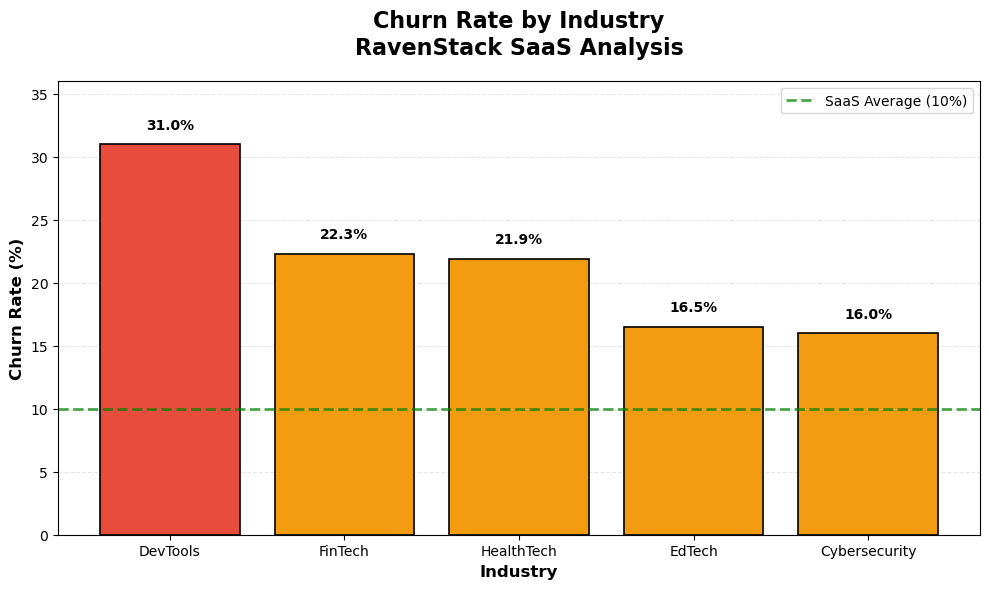

ANALİZ:
En yüksek churn: DevTools (%31.0)
En düşük churn: Cybersecurity (%16.0)
Fark: %15.0


In [5]:
fig, ax = plt.subplots(figsize=(10, 6))

colors = []
for rate in industry_churn['Churn_Rate']:
    if rate > 25:
        colors.append('#e74c3c')
    elif rate > 15:
        colors.append('#f39c12')
    else:
        colors.append('#27ae60') 

bars = ax.bar(
    industry_churn.index,
    industry_churn['Churn_Rate'],
    color=colors,
    edgecolor='black',
    linewidth=1.2
)

ax.set_title('Churn Rate by Industry\nRavenStack SaaS Analysis', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Industry', fontsize=12, fontweight='bold')
ax.set_ylabel('Churn Rate (%)', fontsize=12, fontweight='bold')

for i, (idx, row) in enumerate(industry_churn.iterrows()):
    ax.text(
        i,
        row['Churn_Rate'] + 1,
        f"{row['Churn_Rate']:.1f}%",
        ha='center',
        va='bottom',
        fontweight='bold'
    )

ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

ax.set_ylim(0, industry_churn['Churn_Rate'].max() + 5)

ax.axhline(
    y=10, 
    color='green', 
    linestyle='--', 
    linewidth=2, 
    label='SaaS Average (10%)',
    alpha=0.7
)
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

print("ANALİZ:")
highest = industry_churn.index[0]
lowest = industry_churn.index[-1]
print(f"Highest churn: {highest} (%{industry_churn.loc[highest, 'Churn_Rate']:.1f})")
print(f"Lowest churn: {lowest} (%{industry_churn.loc[lowest, 'Churn_Rate']:.1f})")
print(f"Difference: %{industry_churn.loc[highest, 'Churn_Rate'] - industry_churn.loc[lowest, 'Churn_Rate']:.1f}")

In [6]:
plan_churn = accounts.groupby('plan_tier').agg({
    'account_id': 'nunique',
    'churn_flag': 'sum'
})

plan_churn.columns = ['Total_Customers', 'Churned_Customers']

plan_churn['Churn_Rate'] = (
    plan_churn['Churned_Customers'] / plan_churn['Total_Customers'] * 100
).round(1)

plan_order = ['Basic', 'Pro', 'Enterprise']
plan_churn = plan_churn.reindex(plan_order)

plan_churn

,Total_Customers,Churned_Customers,Churn_Rate
plan_tier,,,
Basic,168,37,22.0
Pro,178,39,21.9
Enterprise,154,34,22.1


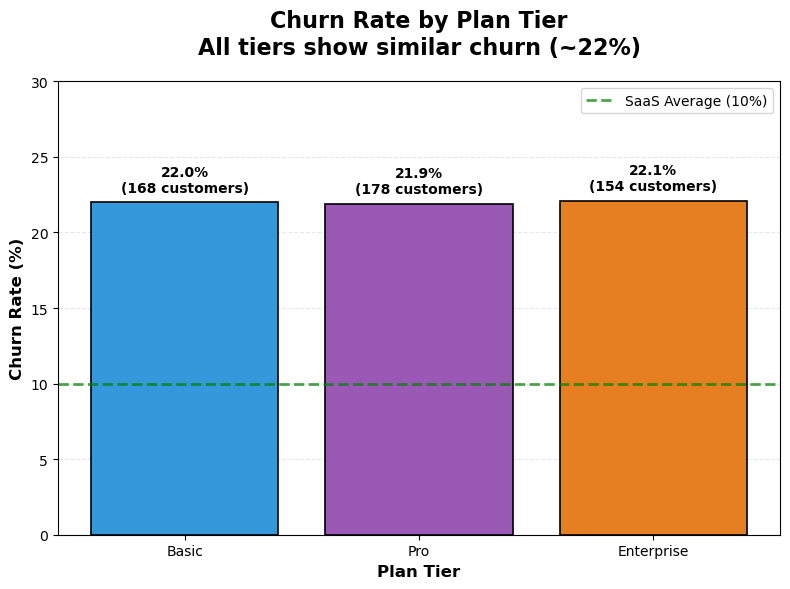

ANALİZ:
Basic:      %22.0
Pro:        %21.9
Enterprise: %22.1
Plan'lar arası fark: %0.2
INSIGHT: Plan tier churn'ü ETKİLEMİYOR!
Problem pricing'de değil, genel hizmet kalitesinde olabilir


In [7]:
fig, ax = plt.subplots(figsize=(8, 6))

colors = ['#3498db', '#9b59b6', '#e67e22']

bars = ax.bar(
    plan_churn.index, 
    plan_churn['Churn_Rate'],
    color=colors,
    edgecolor='black',
    linewidth=1.2
)

ax.set_title('Churn Rate by Plan Tier\nAll tiers show similar churn (~22%)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Plan Tier', fontsize=12, fontweight='bold')
ax.set_ylabel('Churn Rate (%)', fontsize=12, fontweight='bold')

for i, (idx, row) in enumerate(plan_churn.iterrows()):
    ax.text(
        i, 
        row['Churn_Rate'] + 0.5, 
        f"{row['Churn_Rate']:.1f}%\n({int(row['Total_Customers'])} customers)",
        ha='center', 
        va='bottom', 
        fontweight='bold', 
        fontsize=10
    )

ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

ax.set_ylim(0, 30)

ax.axhline(
    y=10, 
    color='green', 
    linestyle='--', 
    linewidth=2, 
    label='SaaS Average (10%)',
    alpha=0.7
)
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

print(f"Basic:      %{plan_churn.loc['Basic', 'Churn_Rate']:.1f}")
print(f"Pro:        %{plan_churn.loc['Pro', 'Churn_Rate']:.1f}")
print(f"Enterprise: %{plan_churn.loc['Enterprise', 'Churn_Rate']:.1f}")

max_churn = plan_churn['Churn_Rate'].max()
min_churn = plan_churn['Churn_Rate'].min()
diff = max_churn - min_churn

print(f"Difference between plans: {diff:.1f}%")
if diff < 2:
    print("INSIGHT: Plan tier does NOT AFFECT churn!")
    print("Problem may not be in pricing, but in general service quality")
elif diff < 5:
    print("INSIGHT: Small difference exists but not critical")
else:
    print("INSIGHT: Significant difference exists, strategy needed for plans")

In [8]:
active_subs = subscriptions[subscriptions["churn_flag"] == False]
account_mrr = active_subs.groupby("account_id")["mrr_amount"].sum()
arpu = account_mrr.mean()
median_arpu = account_mrr.median()
min_arpu = account_mrr.min()
max_arpu = account_mrr.max()
print(f"ARPU STATISTICS:")
print(f"Customer count: {len(account_mrr):,}")
print(f"Average (Mean): ${arpu:,.2f}/month")
print(f"Median: ${median_arpu:,.2f}/month")
print(f"Minimum: ${min_arpu:,.2f}/month")
print(f"Maximum: ${max_arpu:,.2f}/month")

ARPU İSTATİSTİKLERİ:
Müşteri sayısı: 500
Ortalama (Mean): $20,319.22/ay
Ortanca (Median): $16,654.00/ay
Minimum: $171.00/ay
Maximum: $131,911.00/ay


Sağa çarpık dağılım (whale müşteri var)


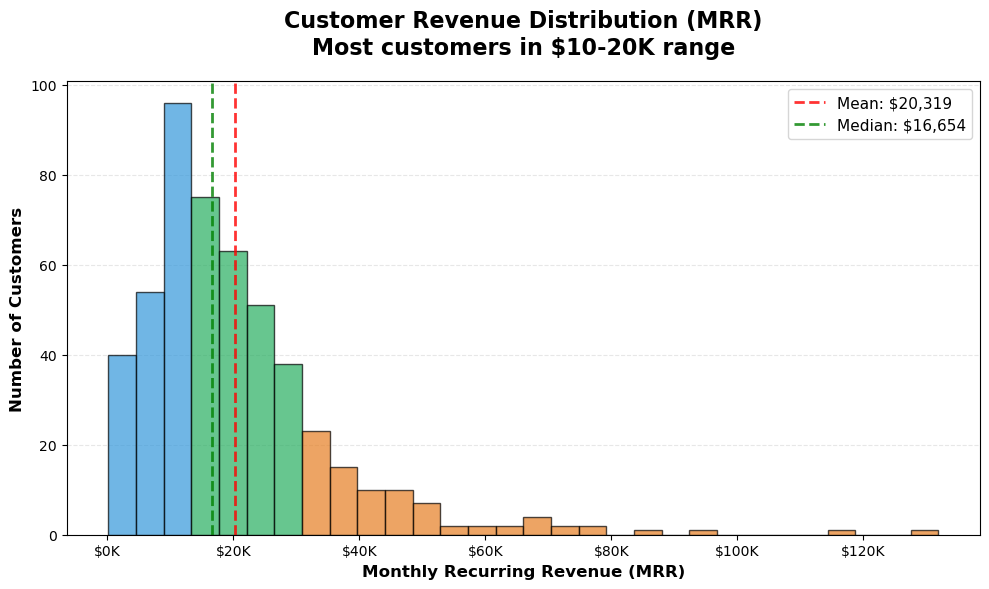

In [9]:
if arpu > median_arpu:
    print("Sağa çarpık dağılım (whale müşteri var)")
else:
    print("Normal dağılım")

fig, ax = plt.subplots(figsize=(10, 6))

n, bins, patches = ax.hist(
    account_mrr, 
    bins=30,
    color='#3498db',
    edgecolor='black', 
    alpha=0.7
)

for i in range(len(patches)):
    if bins[i] < 10000:
        patches[i].set_facecolor('#3498db')
    elif bins[i] < 30000:
        patches[i].set_facecolor('#27ae60')
    else:
        patches[i].set_facecolor('#e67e22')

ax.set_title('Customer Revenue Distribution (MRR)\nMost customers in $10-20K range', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Monthly Recurring Revenue (MRR)', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Customers', fontsize=12, fontweight='bold')

ax.axvline(
    x=arpu, 
    color='red', 
    linestyle='--', 
    linewidth=2,
    label=f'Mean: ${arpu:,.0f}',
    alpha=0.8
)

ax.axvline(
    x=median_arpu, 
    color='green', 
    linestyle='--', 
    linewidth=2,
    label=f'Median: ${median_arpu:,.0f}',
    alpha=0.8
)

ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

ax.legend(loc='upper right', fontsize=11)

ax.xaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K')
)

plt.tight_layout()
plt.show()

In [10]:
print("ANALİZ:")

under_10k = (account_mrr < 10000).sum()
between_10_30k = ((account_mrr >= 10000) & (account_mrr < 30000)).sum()
over_30k = (account_mrr >= 30000).sum()

print(f"SEGMENT DAĞILIMI:")
print(f"SMB (<$10K):           {under_10k} müşteri (%{under_10k/len(account_mrr)*100:.1f})")
print(f"Mid-Market ($10-30K):  {between_10_30k} müşteri (%{between_10_30k/len(account_mrr)*100:.1f})")
print(f"Enterprise (>$30K):    {over_30k} müşteri (%{over_30k/len(account_mrr)*100:.1f})")

top_10_percent = account_mrr.quantile(0.90)
whales = (account_mrr >= top_10_percent).sum()
whale_revenue = account_mrr[account_mrr >= top_10_percent].sum()
whale_revenue_pct = whale_revenue / account_mrr.sum() * 100

print(f"WHALE MÜŞTERİLER (Top 10%):")
print(f"Müşteri sayısı: {whales}")
print(f"Gelir katkısı: ${whale_revenue:,.0f} (%{whale_revenue_pct:.1f} of total)")

if whale_revenue_pct > 40:
    print("DİKKAT: Gelirin %{:.0f}'ı sadece {} müşteriden geliyor!".format(whale_revenue_pct, whales))
    print("Bu müşterileri kaybetmek çok riskli!")
    print("White-glove service, dedicated CSM gerekli")

ANALİZ:
SEGMENT DAĞILIMI:
SMB (<$10K):           115 müşteri (%23.0)
Mid-Market ($10-30K):  293 müşteri (%58.6)
Enterprise (>$30K):    92 müşteri (%18.4)
WHALE MÜŞTERİLER (Top 10%):
Müşteri sayısı: 50
Gelir katkısı: $2,781,650 (%27.4 of total)


In [12]:
total_customers = accounts["account_id"].nunique()
churned = accounts["churn_flag"].sum()
retained = total_customers - churned
churn_rate = (churned / total_customers) * 100

print(f"GENEL DURUM:")
print(f"Toplam müşteri: {total_customers}")
print(f"Retained (Kalan): {retained} (%{retained/total_customers*100:.1f})")
print(f"Churned (Ayrılan): {churned} (%{churn_rate:.1f})")

GENEL DURUM:
Toplam müşteri: 500
Retained (Kalan): 390 (%78.0)
Churned (Ayrılan): 110 (%22.0)


In [17]:
industry_churn = accounts.groupby("industry").agg({
    "account_id": "nunique",
    "churn_flag": "sum"
})

industry_churn.columns = ["Total", "Churned"]
industry_churn["Churn_Rate"] = (
    industry_churn["Churned"] / industry_churn["Total"] * 100
).round(1)
industry_churn = industry_churn.sort_values("Churn_Rate", ascending = False)

top3_churn = industry_churn.head(3)

top3_churn

,Total,Churned,Churn_Rate
industry,,,
DevTools,113,35,31.0
FinTech,112,25,22.3
HealthTech,96,21,21.9


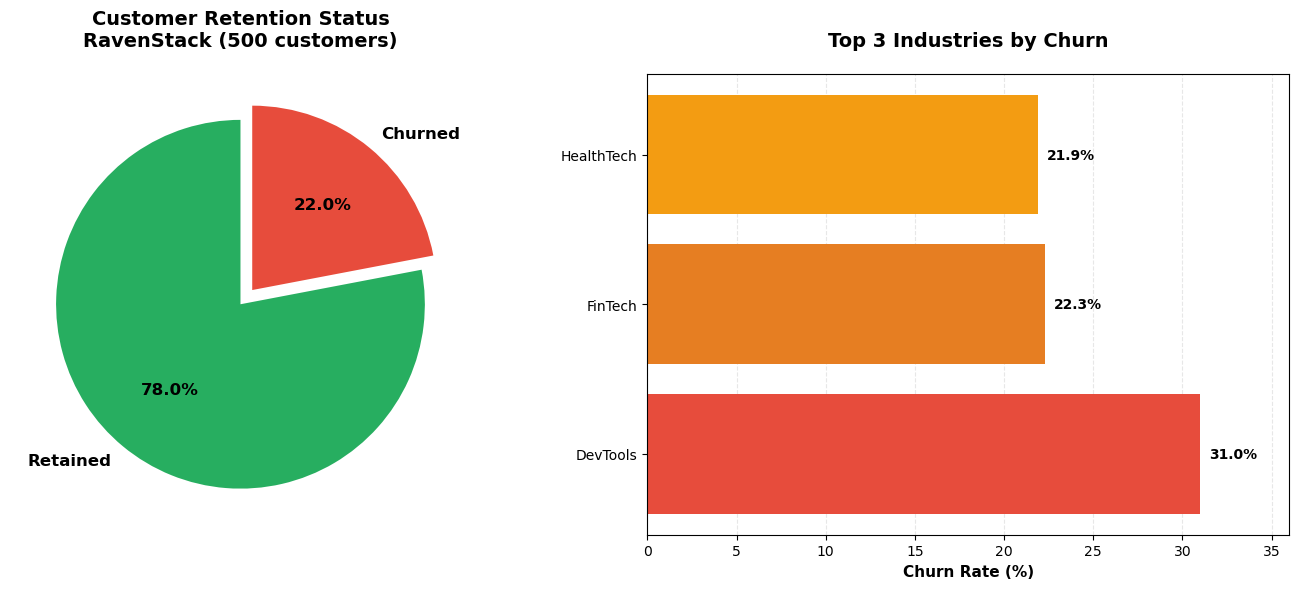

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

sizes = [retained, churned]
colors = ['#27ae60', '#e74c3c']
labels = ['Retained', 'Churned']
explode = (0, 0.1)

ax1.pie(
    sizes, 
    explode=explode,
    labels=labels, 
    colors=colors, 
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 12, 'fontweight': 'bold'}
)

ax1.set_title(
    f'Customer Retention Status\nRavenStack ({total_customers} customers)', 
    fontsize=14, 
    fontweight='bold', 
    pad=20
)

bars = ax2.barh(
    range(len(top3_churn)),
    top3_churn['Churn_Rate'],
    color=['#e74c3c', '#e67e22', '#f39c12']
)

ax2.set_yticks(range(len(top3_churn)))
ax2.set_yticklabels(top3_churn.index)

# Etiketler
ax2.set_xlabel('Churn Rate (%)', fontsize=11, fontweight='bold')
ax2.set_title('Top 3 Industries by Churn', fontsize=14, fontweight='bold', pad=20)

# Her bar üzerine değer yaz
for i, v in enumerate(top3_churn['Churn_Rate']):
    ax2.text(
        v + 0.5,
        i,
        f'{v:.1f}%',
        va='center',
        fontweight='bold'
    )

ax2.grid(axis='x', alpha=0.3, linestyle='--')
ax2.set_axisbelow(True)

ax2.set_xlim(0, top3_churn['Churn_Rate'].max() + 5)

plt.tight_layout()
plt.show()

In [21]:
print("ANALİZ:")
print(f"GENEL RETENTION:")
print(f"%{retained/total_customers*100:.1f} müşteri kaldı")
print(f"%{churn_rate:.1f} müşteri ayrıldı (SaaS avg: %7-10)")

print(f"EN RİSKLİ SEKTÖRLER:")
for idx, row in top3_churn.iterrows():
    print(f"   • {idx}: %{row['Churn_Rate']:.1f} ({int(row['Churned'])}/{int(row['Total'])} müşteri)")
print("")

# Final insight
if churn_rate > 20:
    print("KRİTİK: Churn rate çok yüksek!")
    print("Acil retention stratejisi gerekli")
    print("DevTools segmentine odak (en yüksek churn)")
elif churn_rate > 15:
    print("UYARI: Churn rate yüksek")
    print("Retention programı başlat")
else:
    print("İYİ: Churn rate sektör ortalamasında")

ANALİZ:
GENEL RETENTION:
%78.0 müşteri kaldı
%22.0 müşteri ayrıldı (SaaS avg: %7-10)
EN RİSKLİ SEKTÖRLER:
   • DevTools: %31.0 (35/113 müşteri)
   • FinTech: %22.3 (25/112 müşteri)
   • HealthTech: %21.9 (21/96 müşteri)

KRİTİK: Churn rate çok yüksek!
Acil retention stratejisi gerekli
DevTools segmentine odaklan (en yüksek churn)
